# Labeling
Labeling is the process of giving numbers to object in a binary image. Remember, a binary image has intensity zero where there is no object and 1 where there is any object. We now want to generate a label image where individual objects have different numbers. To get it, we need to label connected components.

See also
* [Connected-component labeling](https://en.wikipedia.org/wiki/Connected-component_labeling)

We start with an artifical image

In [1]:
import numpy as np

binary_image = np.asarray([
    [1, 1, 0, 0, 0, 0 ,0],
    [0, 0, 1, 0, 0, 0 ,0],
    [0, 0, 0, 1, 1, 1 ,0],
    [0, 0, 0, 1, 1, 1 ,0],
    [1, 1, 0, 0, 0, 0 ,0],
    [1, 1, 0, 0, 1, 1 ,1],
    [1, 1, 0, 0, 1, 1 ,1],    
])

C:\Programs\miniconda3\envs\beetlesafari\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


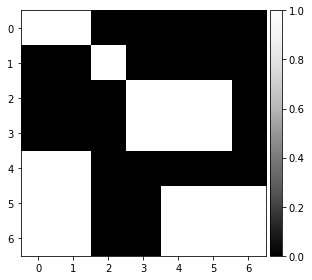

In [2]:
from skimage.io import imshow

imshow(binary_image, cmap='Greys_r')

This binary image can be interpreted in two ways: Either there are five rectangles with size ranging between 1 and 6. Alternatively, there are two rectangles with size 6 and one not rectangluar structure of size 9 pixels.

We can technially use both alternatives for connected components labeling, depending on the connectivity that is used for connecting pixels in the [label function](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.label).

Connectivity
1. [von Neumann, 4-connected](https://en.wikipedia.org/wiki/Von_Neumann_neighborhood)
2. [Moore, 8-connected](https://en.wikipedia.org/wiki/Moore_neighborhood)

## 4-connected component labeling

C:\Programs\miniconda3\envs\beetlesafari\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


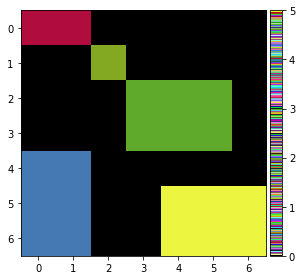

In [3]:
from skimage.measure import label
labeled_4_connected = label(binary_image, connectivity=1)

# make a custom lookup table / color map
import matplotlib
lut = np.random.rand ( 256,3)
lut[0,:] = 0
label_cmap = matplotlib.colors.ListedColormap ( lut ) 

imshow(labeled_4_connected, cmap=label_cmap)

## 8-connected component labeling

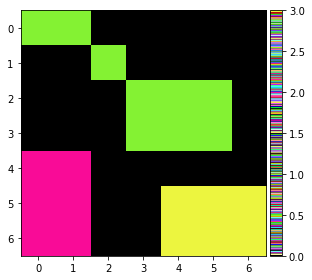

In [4]:
from skimage.measure import label
labeled_8_connected = label(binary_image, connectivity=2)

imshow(labeled_8_connected, cmap=label_cmap)

In practice, for counting cells, the connectivity is not so important. This is why the connectivity parameter is often not provided.

## Labeling in practice
To demonstrate labeling in a practical use case, we label the blobs.tif image.

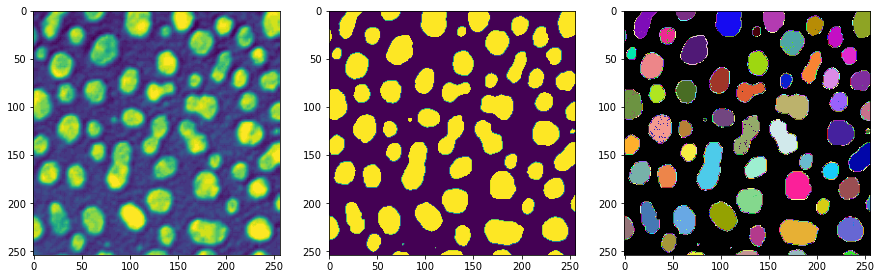

In [5]:
# Load data
from skimage.io import imread
blobs = imread("blobs.tif")

# Thresholding
from skimage.filters import threshold_otsu
threshold = threshold_otsu(blobs)
binary_blobs = blobs > threshold

# Labeling
from skimage.measure import label
labeled_blobs = label(binary_blobs)

# Visualization
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15,15))

axs[0].imshow(blobs)
axs[1].imshow(binary_blobs)
axs[2].imshow(labeled_blobs, cmap=label_cmap)

For visualizing and potentially manually curating blobs, we can load these images into napari.

In [6]:
%gui qt

In [7]:
import napari

# start napari
viewer = napari.Viewer()

# add image
viewer.add_image(blobs)

# add binary image as labels
viewer.add_labels(binary_blobs, visible=False)

# add labels
viewer.add_labels(labeled_blobs)

<Labels layer 'labeled_blobs' at 0x1d588002df0>

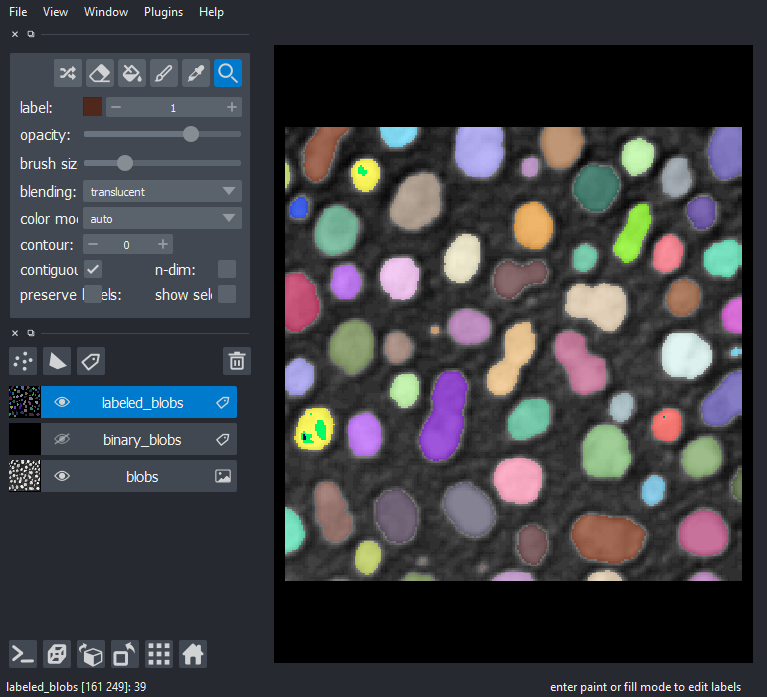

In [8]:
napari.utils.nbscreenshot(viewer)

## Exercise
Find out experimentally what the default setting of the connectivity parameter of the label function is.